# Dataset

In [42]:
import pandas as pd

In [43]:
df_1 = pd.read_csv('dog_characteristics.csv', delimiter=';')
df_1.head()

,BreedName,Group1,Group2,Price,Weight(Kg),Watchdog,Popularity,Temperament
0,Affenpinscher,Toy,Companion,1000.0,4,1.0,147.0,"Active, Adventurous, Curious, Fun-loving, Play..."
1,Afghan Hound,Sporting,Sight,2250.0,28,1.0,93.0,"Aloof, Clownish, Dignified, Happy, Independent"
2,African Hunting Dog,NaN,NaN,NaN,23,NaN,NaN,Wild
3,Airedale Terrier,Terrier,Terrier,700.0,26,4.0,55.0,"Alert, Confident, Courageous, Friendly, Intell..."
4,Akbash,Working,Guardian,600.0,53,5.0,NaN,"Affectionate, Alert, Courageous, Independent, ..."


In [44]:
df_2 = pd.read_csv('dog_trait.csv', delimiter=';')
df_2.head()

,BreedName,Trait
0,Affenpinscher,Active
1,Affenpinscher,Adventurous
2,Affenpinscher,Curious
3,Affenpinscher,Fun-loving
4,Affenpinscher,Playful


# Price Analysis

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

In [46]:
df_1['Price']
df_1['Price'].describe().round(2)

count      243.00
mean      1201.23
std       2489.23
min        350.00
25%        700.00
50%        900.00
75%       1350.00
max      39000.00
Name: Price, dtype: float64

<Axes: ylabel='Price'>

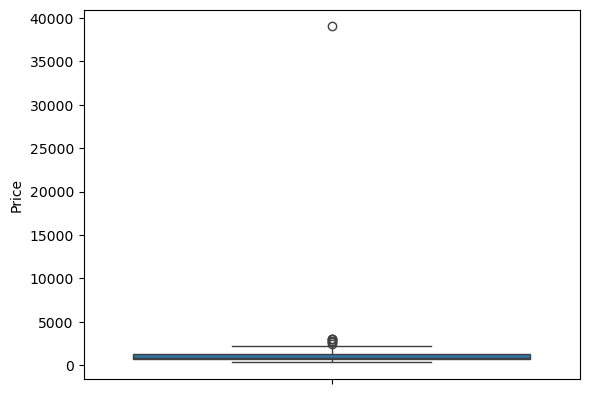

In [47]:
sns.boxplot(data=df_1, y='Price')

## Correcting data

In [48]:
df_1.sort_values('Price', ascending=0)[:1]

,BreedName,Group1,Group2,Price,Weight(Kg),Watchdog,Popularity,Temperament
81,Dogo Argentino,Working,Guardian,39000.0,43,5.0,NaN,"Affectionate, Cheerful, Friendly, Loyal, Prote..."


In [49]:
df_1 = df_1[df_1['BreedName'] != 'Dogo Argentino']
df_2 = df_2[df_2['BreedName'] != 'Dogo Argentino']

In [50]:
df_1 = df_1.reset_index(drop=True)
df_2 = df_2.reset_index(drop=True)

Doing the correct analysis

In [51]:
df_1['Price'].describe().round(2)

count     242.00
mean     1045.04
std       518.73
min       350.00
25%       700.00
50%       900.00
75%      1350.00
max      3000.00
Name: Price, dtype: float64

<Axes: ylabel='Price'>

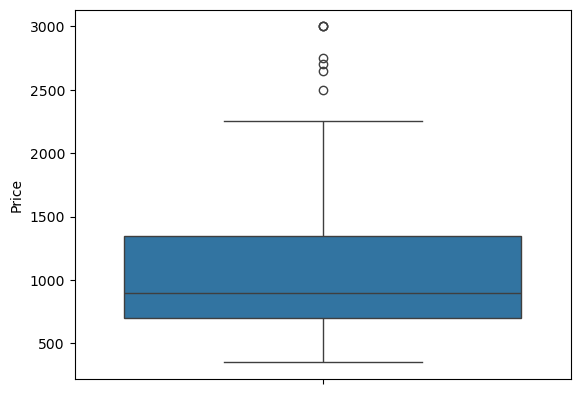

In [52]:
sns.boxplot(data=df_1, y='Price')

## Outliers

$$\text{Lower Outlier} = Q_1 - (1.5 \cdot \text{IQR})$$
$$\text{Higher Outlier} = Q_3 + (1.5 \cdot \text{IQR})$$
$$\text{IQR} = Q_3 - Q_1$$

In [53]:
Q1 = df_1['Price'].quantile(.25)
Q3 = df_1['Price'].quantile(.75)
IQR = Q3 - Q1
low_out = Q1 - (1.5 * IQR)
hig_out = Q3 + (1.5 * IQR)
print('higher outlier =', hig_out)
print('lower outlier =', low_out)

higher outlier = 2325.0
lower outlier = -275.0


In [54]:
outliers = df_1[df_1['Price'] > hig_out].sort_values('Price', ascending=1)
outliers[['BreedName', 'Price']].sort_values('Price', ascending=0)

,BreedName,Price
101,French Bulldog,3000.0
133,Kai Dog,3000.0
223,Tibetan Mastiff,3000.0
187,Pumi,2750.0
73,Coton de Tulear,2700.0
183,Portuguese Water Dog,2650.0
219,Sussex Spaniel,2500.0


<BarContainer object of 7 artists>

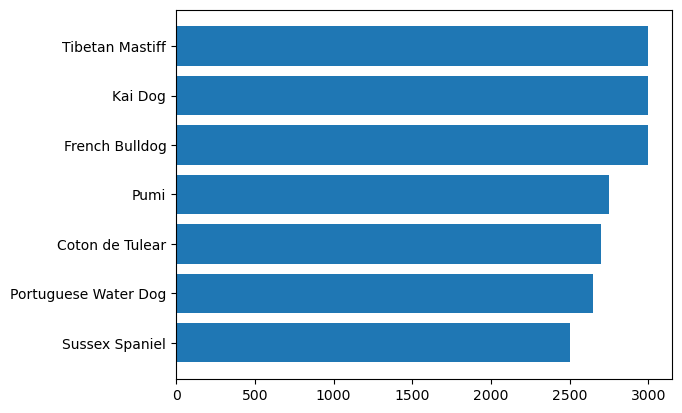

In [55]:
plt.barh(y = outliers['BreedName'], width=outliers['Price'])

Do these breeds have any traits in common?

In [107]:
df_2[df_2['BreedName'].isin(outliers['BreedName'])].groupby('Trait').count().sort_values('BreedName', ascending=0)[0:10]

,BreedName
Trait,
Intelligent,4
Lively,3
Brave,2
Affectionate,2
Playful,2
Protective,2
Vocal,2
Alert,2
Sociable,1


## Data without outliers Analysis

In [56]:
df_out = df_1[df_1['Price'].isna() == False].drop(index=outliers.index)
df_out['Price'].describe().round(2)

count     235.00
mean      992.77
std       425.69
min       350.00
25%       700.00
50%       900.00
75%      1275.00
max      2250.00
Name: Price, dtype: float64

Histogram

<Axes: xlabel='Price', ylabel='Count'>

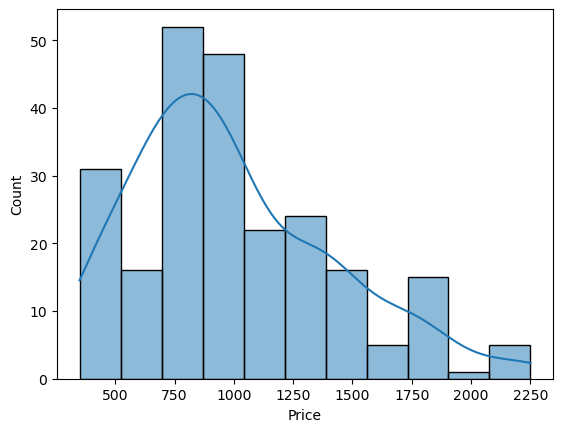

In [57]:
sns.histplot(data=df_out, x='Price', kde=True)

### It's a Normal Distribution? <span style='color:red'>(No) </span>

<Axes: xlabel='Price', ylabel='Density'>

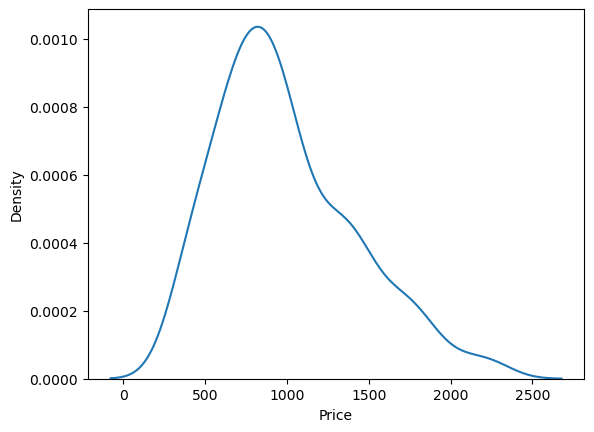

In [58]:
sns.kdeplot(data=df_out, x='Price')

Quantile-Quantile Plot

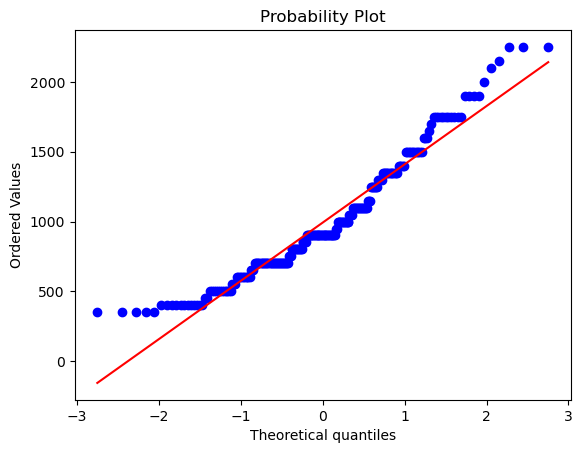

In [59]:
import scipy.stats as stats

stats.probplot(df_out['Price'], dist='norm', plot=plt)
plt.show()

Anderson-Darling test

In [60]:
stats.anderson(df_out['Price'])

AndersonResult(statistic=4.0216845200001785, critical_values=array([0.567, 0.645, 0.774, 0.903, 1.074]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=992.7659574468086, scale=425.6854810193581)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

### Analysis of Variance

In [61]:
print('variance =', round(df_out['Price'].var(),2))

variance = 181208.13


#### Group

First, we need to join all groups in one column

In [62]:
df_group = df_out[['BreedName','Group1','Group2','Price']].copy()
df_group['Group'] = df_out['Group1'] + ',' + df_out['Group2']
df_group['Group'] = df_group['Group'].str.split(',')
df_group.drop(columns=['Group1','Group2'], inplace=True)
df_group = df_group.explode('Group', ignore_index=True)
df_group

,BreedName,Price,Group
0,Affenpinscher,1000.0,Toy
1,Affenpinscher,1000.0,Companion
2,Afghan Hound,2250.0,Sporting
3,Afghan Hound,2250.0,Sight
4,Airedale Terrier,700.0,Terrier
...,...,...,...
464,Xoloitzcuintle/Mexican Hairless,700.0,Sight
465,Yellow Labrador Retriever,1500.0,Sporting
466,Yellow Labrador Retriever,1500.0,Gun
467,Yorkshire Terrier Yorkie,800.0,Toy


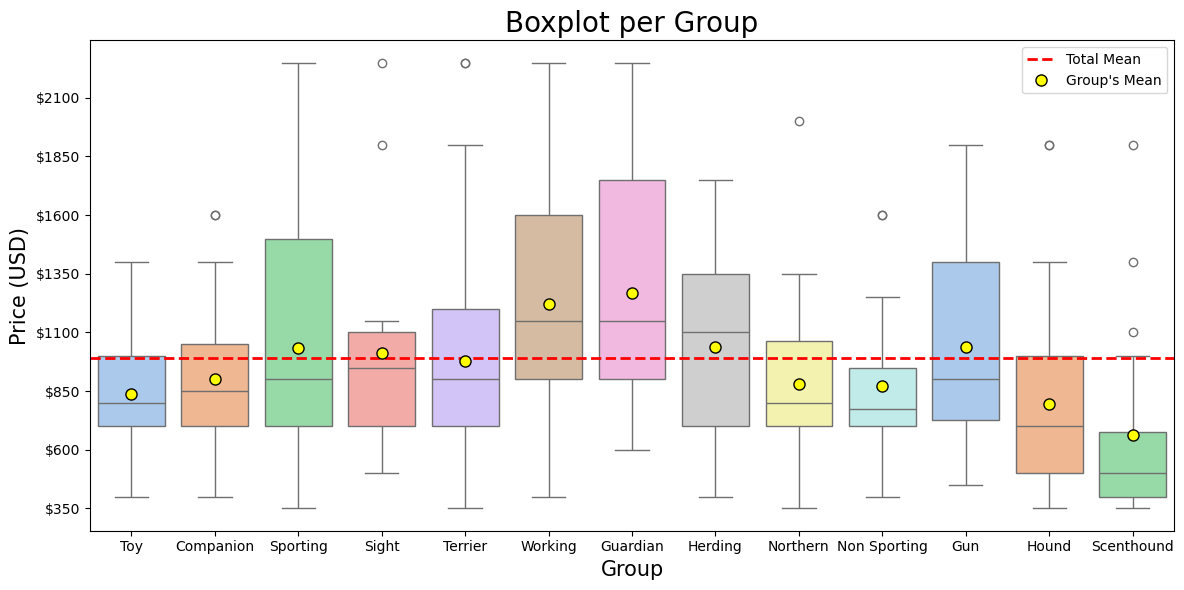

In [63]:
# Create figure
plt.figure(figsize=(12, 6))
ax = sns.boxplot(data=df_group, x='Group', y='Price', hue='Group', legend=False, palette='pastel',
                  showmeans=True, meanprops={"marker": "o", "markerfacecolor": "yellow", 'markeredgecolor':'black', "markersize": 8})

# Horizontal Line
plt.axhline(df_out['Price'].mean(), color='red', linestyle='--', linewidth=2, label='Total Mean')

# Legend
handles, labels = ax.get_legend_handles_labels()
handles.append(plt.Line2D([], [], markerfacecolor='yellow', markeredgecolor='black', marker='o', linestyle='', markersize=8))
labels.append('Group\'s Mean')
ax.legend(handles=handles, labels=labels, loc='upper right')

# Axes Labels
plt.xlabel('Group', fontsize=15)
plt.ylabel('Price (USD)', fontsize=15)
plt.yticks(ticks=[p for p in range(int(df_out['Price'].min()), int(df_out['Price'].max()), 250)], labels=[f'${p}' for p in range(int(df_out['Price'].min()), int(df_out['Price'].max()), 250)])

# Plot
plt.title('Boxplot per Group', fontsize=20)
plt.tight_layout()
plt.show()

Kruskal-Wallis Test

In [291]:
values = df_group[df_group['Group'].isna() == False]['Group'].unique()
data1, data2, data3, data4, data5, data6, data7, data8, data9, data10, data11, data12, data13 = [df_out[df_group['Group'] == g]['Price'] for g in values]
stats.kruskal(data1, data2, data3, data4, data5, data6, data7, data8, data9, data10, data11, data12, data13)

C:\Users\pedac\AppData\Local\Temp\ipykernel_2604\3524048519.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data1, data2, data3, data4, data5, data6, data7, data8, data9, data10, data11, data12, data13 = [df_out[df_group['Group'] == g]['Price'] for g in values]
C:\Users\pedac\AppData\Local\Temp\ipykernel_2604\3524048519.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data1, data2, data3, data4, data5, data6, data7, data8, data9, data10, data11, data12, data13 = [df_out[df_group['Group'] == g]['Price'] for g in values]
C:\Users\pedac\AppData\Local\Temp\ipykernel_2604\3524048519.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data1, data2, data3, data4, data5, data6, data7, data8, data9, data10, data11, data12, data13 = [df_out[df_group['Group'] == g]['Price'] for g in values]
C:\Users\pedac\AppData\Local\Temp\ipykernel_2604\3524048519.py:2: UserWarning: Boolean Series key will be 

KruskalResult(statistic=18.00568107871926, pvalue=0.11551813260409063)

##### Scenthound Analysis

<Axes: ylabel='Price'>

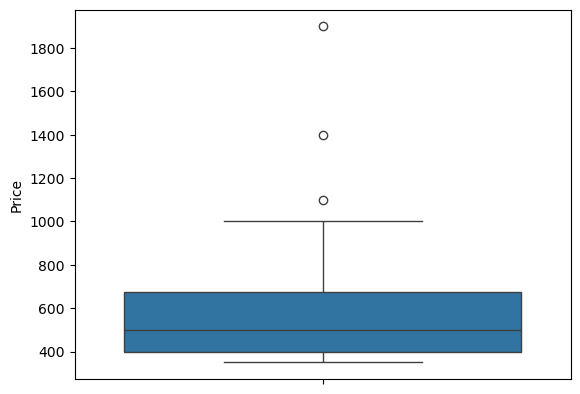

In [65]:
Scenthound = df_group[df_group['Group'] == 'Scenthound']
sns.boxplot(data=Scenthound, y='Price')

Outliers

In [66]:
Scenthound.sort_values('Price', ascending=False)[['BreedName','Price']][0:3]

,BreedName,Price
240,Irish Wolfhound,1900.0
328,Petit Basset Griffon Vendeen,1400.0
162,English Coonhound,1100.0


data without outliers

In [67]:
Scenthound_data = Scenthound.drop(index=Scenthound.sort_values('Price', ascending=False)[0:3].index)

It's a normal distribution? <span style='color:red'>(No)</span>

<Axes: xlabel='Price', ylabel='Density'>

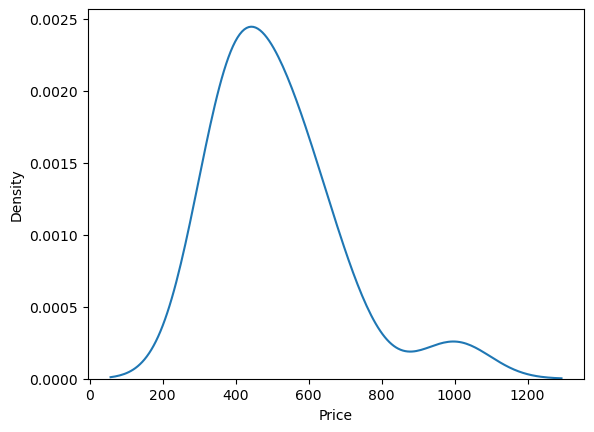

In [68]:
sns.kdeplot(Scenthound_data['Price'])

Quantile-Quantile Plot

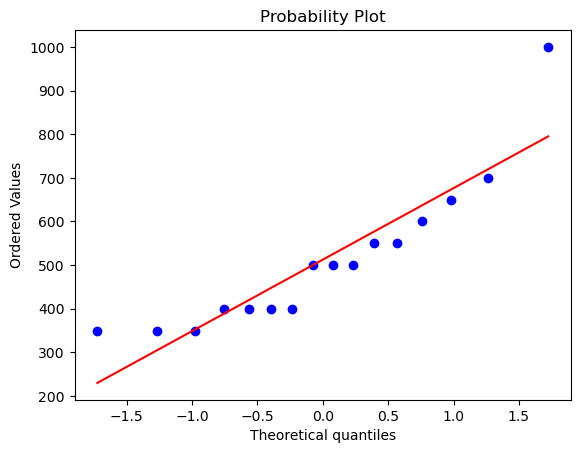

In [69]:
stats.probplot(Scenthound_data['Price'], dist='norm', plot=plt)
plt.show()

Shapiro-Wilk test

In [70]:
stats.shapiro(Scenthound_data['Price'])

ShapiroResult(statistic=0.8349192154647561, pvalue=0.008237544910100779)

Wilcoxon test for one sample

In [71]:
stats.wilcoxon(Scenthound_data['Price'] - df_out['Price'].mean())

WilcoxonResult(statistic=1.0, pvalue=6.103515625e-05)

#### Watchdog

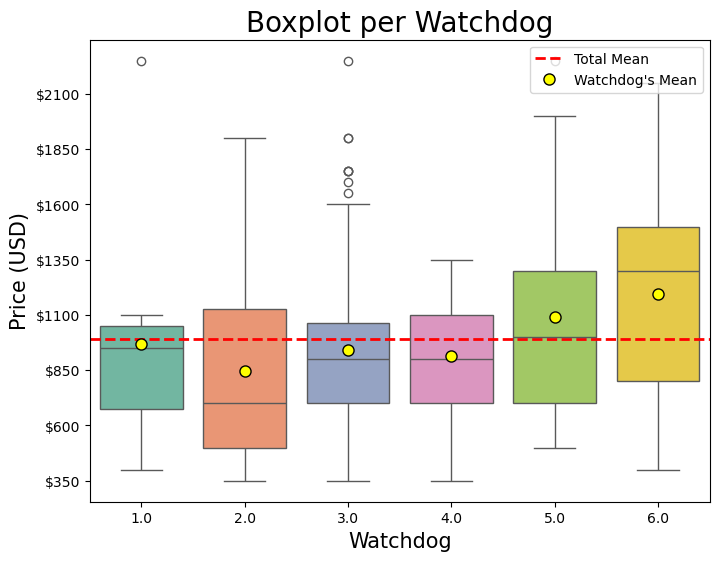

In [72]:
# Create figure
plt.figure(figsize=(8, 6))
ax = sns.boxplot(data=df_out, x='Watchdog', y='Price', hue='Watchdog', legend=False, palette='Set2',
                  showmeans=True, meanprops={"marker": "o", "markerfacecolor": "yellow", 'markeredgecolor':'black', "markersize": 8})

# Horizontal Line
plt.axhline(df_out['Price'].mean(), color='red', linestyle='--', linewidth=2, label='Total Mean')

# Legend
handles, labels = ax.get_legend_handles_labels()
handles.append(plt.Line2D([], [], markerfacecolor='yellow', markeredgecolor='black', marker='o', linestyle='', markersize=8))
labels.append('Watchdog\'s Mean')
ax.legend(handles=handles, labels=labels, loc='upper right')

# Axes Labels
plt.xlabel('Watchdog', fontsize=15)
plt.ylabel('Price (USD)', fontsize=15)
plt.yticks(ticks=[p for p in range(int(df_out['Price'].min()), int(df_out['Price'].max()), 250)], labels=[f'${p}' for p in range(int(df_out['Price'].min()), int(df_out['Price'].max()), 250)])

# Plot
plt.title('Boxplot per Watchdog', fontsize=20)
plt.show()

Kruskal-Wallis Test

In [73]:
values = df_out[df_out['Watchdog'].isna() == False]['Watchdog'].unique()
data1, data2, data3, data4, data5, data6 = [df_out[df_out['Watchdog'] == g]['Price'] for g in values]
stats.kruskal(data1, data2, data3, data4, data5, data6)

KruskalResult(statistic=12.82277800084842, pvalue=0.025097357004631685)

There is a correlation between Watchdog and Average Price?

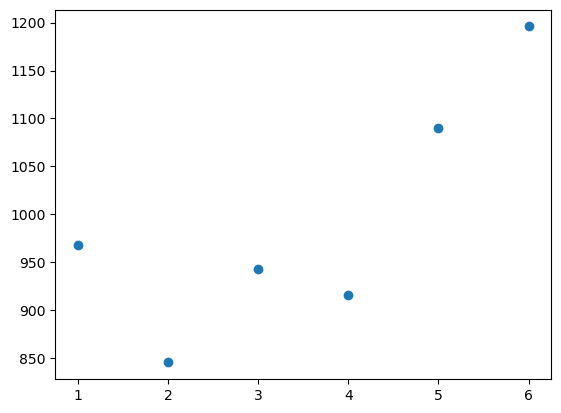

In [74]:
watchdog = df_out.groupby('Watchdog')['Price'].mean().index.tolist()
watchdog_avg = df_out.groupby('Watchdog')['Price'].mean().values.tolist()
plt.scatter(watchdog, watchdog_avg)
plt.show()

It's a normal distribution? (<span style='color:green'> Yes </span>)

<Axes: ylabel='Density'>

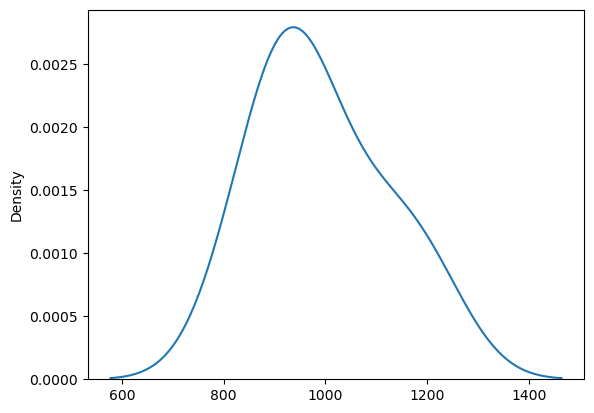

In [75]:
sns.kdeplot(watchdog_avg)

Quantile-Quantile Plot

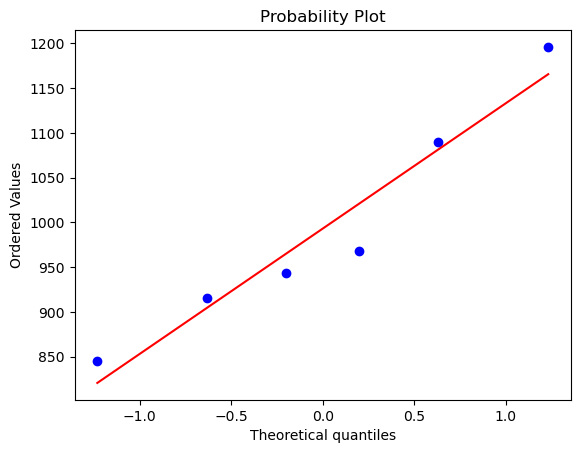

In [76]:
import scipy.stats as stats

stats.probplot(watchdog_avg, dist='norm', plot=plt)
plt.show()

Shapiro-Wilk test

In [77]:
stats.shapiro(watchdog_avg)

ShapiroResult(statistic=0.9386329082172727, pvalue=0.64820379331422)

Pearson Correlation

In [78]:
stats.pearsonr(watchdog, watchdog_avg)

PearsonRResult(statistic=0.7727510629610981, pvalue=0.07159531525457098)

### Correlation

<Axes: >

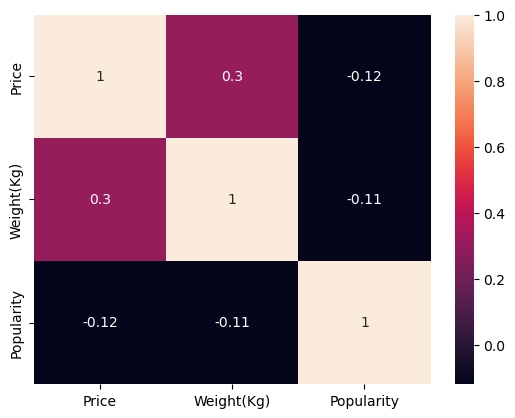

In [79]:
sns.heatmap(df_out[['Price','Weight(Kg)','Popularity']].corr(), annot=True)

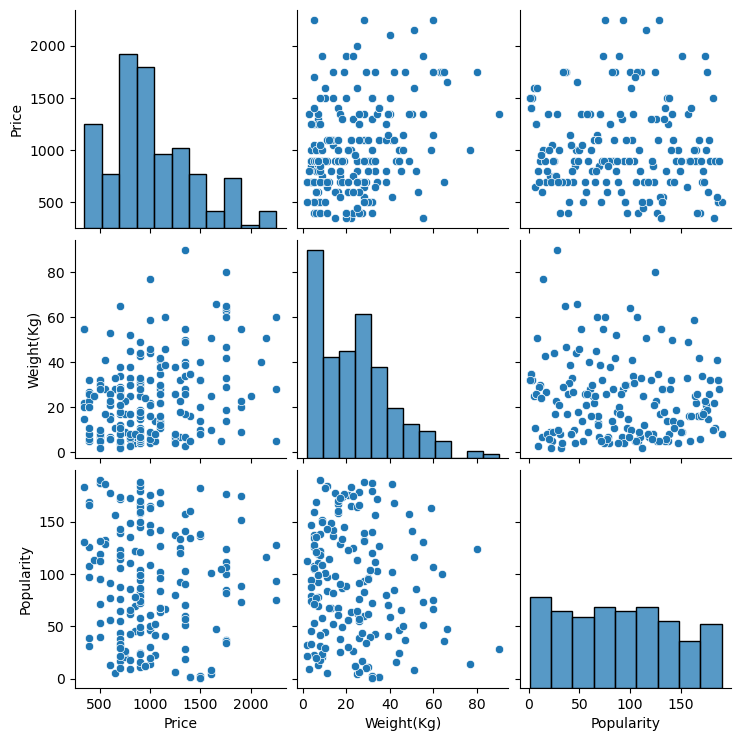

In [80]:
sns.pairplot(data=df_out[['Price','Weight(Kg)','Popularity']])

# Trait Analysis

Most commom traits

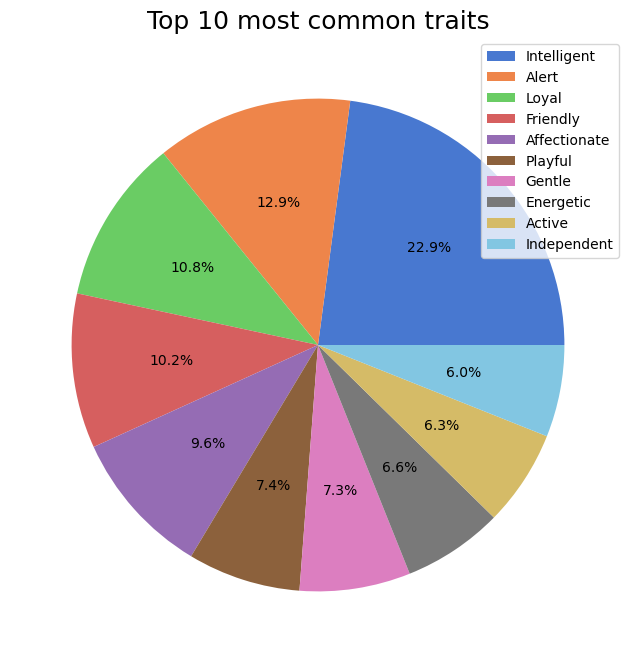

In [168]:
plt.figure(figsize=(10,8))
trait_count = df_2.groupby('Trait').count().sort_values('BreedName', ascending=0)

plt.pie(trait_count['BreedName'][0:10], labels=None, colors=sns.color_palette("muted"),
        autopct='%.1f%%', textprops = {'fontsize': 10})
plt.legend(trait_count.index[0:10], loc='upper right')

plt.title('Top 10 most common traits', fontsize=18)
plt.show()


Most expensive traits

In [213]:
trait_price = {}
for t in df_2['Trait'].unique().tolist():
    trait_price[t] = df_1[df_1['Temperament'].str.contains(t, case=False)]['Price'].mean()
trait_price = pd.DataFrame.from_dict(trait_price, orient='index')
trait_price = trait_price.rename(columns={0: 'Price'})
trait_price.index.name = 'Trait'
trait_price.reset_index(inplace=True)

top_traits = trait_price.sort_values('Price',ascending=0)[0:10].round(2)
top_traits

,Trait,Price
125,Impetuous,2650.00
126,Quarrelsome,2650.00
65,Stable,2150.00
93,Vocal,2016.67
112,Generous,1900.00
113,Thoughtful,1900.00
51,Self-confident,1887.50
105,Patient,1760.00
76,Rational,1750.00
137,Fast,1750.00


<BarContainer object of 10 artists>

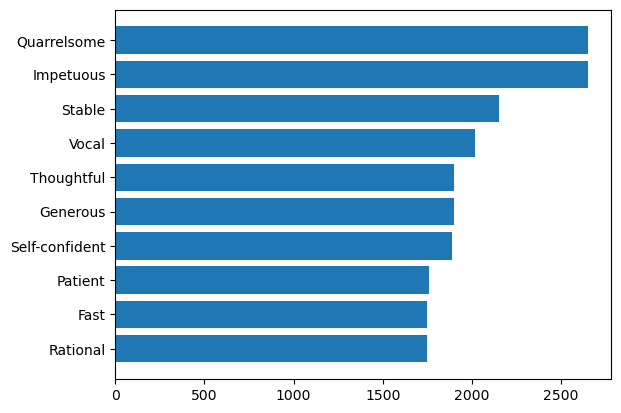

In [214]:
plt.barh(width=top_traits.sort_values('Price')['Price'], y=top_traits.sort_values('Price')['Trait'])

Analysis of Variance

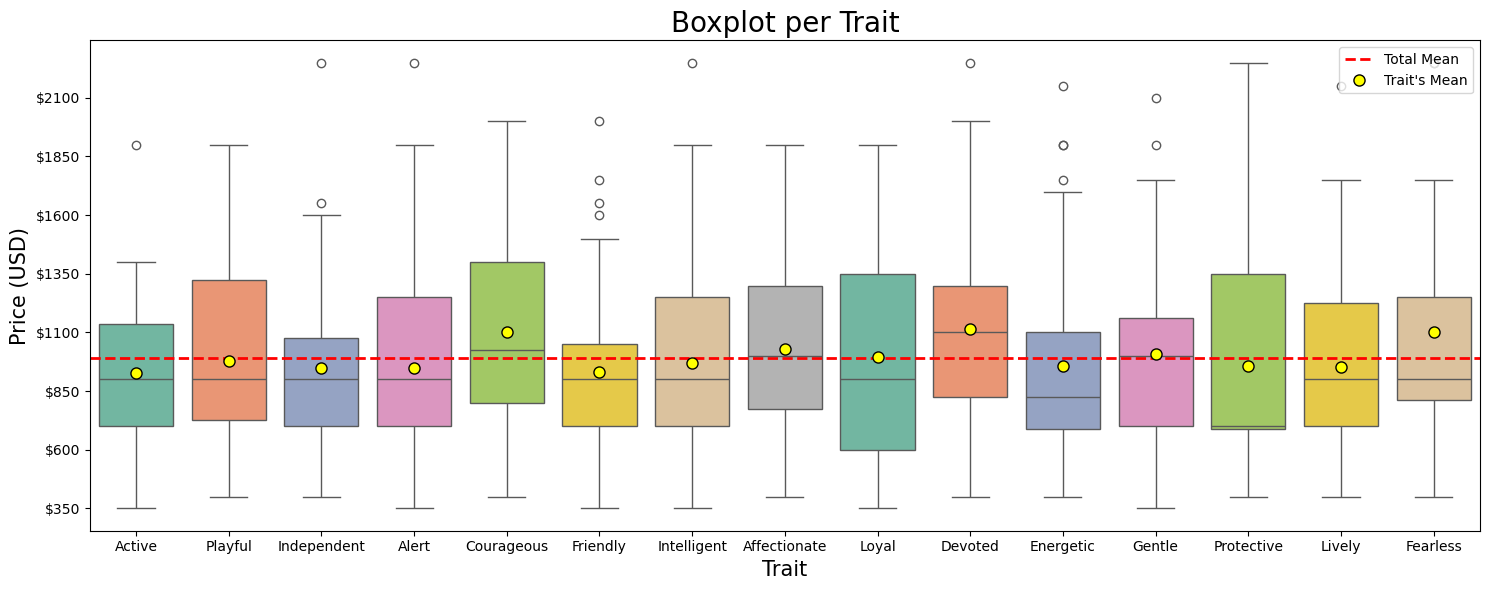

In [281]:
# data
data = df_out.copy()
data['Trait'] = data['Temperament'].str.split(', ')
data = data.explode('Trait', ignore_index=True)
data = data[['Trait','Price']]
data = data[data['Trait'].isin(trait_count.index[0:15])]

# Create figure
plt.figure(figsize=(15, 6))
ax = sns.boxplot(data=data, x='Trait', y='Price', hue='Trait', legend=False, palette='Set2',
                  showmeans=True, meanprops={"marker": "o", "markerfacecolor": "yellow", 'markeredgecolor':'black', "markersize": 8})

# Horizontal Line
plt.axhline(df_out['Price'].mean(), color='red', linestyle='--', linewidth=2, label='Total Mean')

# Legend
handles, labels = ax.get_legend_handles_labels()
handles.append(plt.Line2D([], [], markerfacecolor='yellow', markeredgecolor='black', marker='o', linestyle='', markersize=8))
labels.append('Trait\'s Mean')
ax.legend(handles=handles, labels=labels, loc='upper right')

# Axes Labels
plt.xlabel('Trait', fontsize=15)
plt.ylabel('Price (USD)', fontsize=15)
plt.yticks(ticks=[p for p in range(int(df_out['Price'].min()), int(df_out['Price'].max()), 250)], labels=[f'${p}' for p in range(int(df_out['Price'].min()), int(df_out['Price'].max()), 250)])

# Plot
plt.title('Boxplot per Trait', fontsize=20)
plt.tight_layout()
plt.show()

Kruskal-Wallis Test

In [282]:
values = data[data['Trait'].isna() == False]['Trait'].unique()
data1, data2, data3, data4, data5, data6, data7, data8, data9, data10, data11, data12, data13, data14, data15 = [data[data['Trait'] == g]['Price'] for g in values]
stats.kruskal(data1, data2, data3, data4, data5, data6, data7, data8, data9, data10, data11, data12, data13, data14, data15)

KruskalResult(statistic=13.471950971554842, pvalue=0.48974416472565163)